<a href="https://colab.research.google.com/github/shiva4778/Google-Cyclist-Case-Study/blob/main/google_cyclist_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
case_file1=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/Copy of 202006-divvy-tripdata-july-2020.csv')
case_file2=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/Copy of 202007-divvy-tripdata-august-2020.csv')
case_file3=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/Copy of 202008-divvy-tripdata-september-2020.csv')
case_file4=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/Copy of 202009-divvy-tripdata-october-2020.csv')
case_file5=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/Copy of 202010-divvy-tripdata-november-2020.csv')
case_file6=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/Copy of 202011-divvy-tripdata-december-2020.csv')
case_file7=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/Copy of 202012-divvy-tripdata-january-2021.csv')
case_file8=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/Copy of 202101-divvy-tripdata-february-2021.csv')
case_file9=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/Copy of 202102-divvy-tripdata-march-2021.csv')
case_file10=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/Copy of 202103-divvy-tripdata-april-2021.csv')
case_file11=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/Copy of 202104-divvy-tripdata-may-2021.csv')
case_file12=pd.read_csv('/content/drive/MyDrive/divvy-trip-data/202105-divvy-tripdata-june-2021.csv')

In [103]:
case_file=[case_file1,case_file2,case_file3,case_file4,case_file5,case_file6,case_file7,case_file8,case_file9,case_file10,case_file11,case_file12]

In [104]:
#Merging all the data to a single file
df=pd.concat(case_file)

In [105]:
df.to_csv('google_cyclist.csv')

In [106]:
#converting it into date and time
df['started_at1']=pd.to_datetime(df['started_at'])
df['ended_at1']=pd.to_datetime(df['ended_at'])
df['ride_time']=df['ended_at1']-df['started_at1']
df['ride_delta']=pd.to_timedelta(df['ride_time'])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4073561 entries, 0 to 531632
Data columns (total 17 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          object         
 3   ended_at            object         
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  started_at1         datetime64[ns] 
 14  ended_at1           datetime64[ns] 
 15  ride_time           timedelta64[ns]
 16  ride_delta          timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(9), timedelta64[ns](2)
memory usage: 559.4+ MB


In [108]:
#Separating date 
df['started_date']=[i.split(" ")[0] for i in df['started_at']]
df['started_date']=pd.to_datetime(df['started_date'])

In [109]:
#Week day

In [110]:
df['weekday']=df['started_date'].apply(lambda x :x.weekday())

In [111]:
day_name={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thuresday',5:'Friday',6:'Saturday',0:'Sunday'}

In [112]:
df['week_name'] = df['weekday'].apply(lambda y: day_name[y])

In [113]:
#to sort the dataframe in ascending order
df.sort_values(by=['started_at'],inplace=bool(1),ascending=bool(1))

In [114]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    201975
start_station_id      202601
end_station_name      229190
end_station_id        229651
start_lat                  0
start_lng                  0
end_lat                 5037
end_lng                 5037
member_casual              0
started_at1                0
ended_at1                  0
ride_time                  0
ride_delta                 0
started_date               0
weekday                    0
week_name                  0
dtype: int64

In [115]:
# Drop all rows with any NaN values
df1=df.dropna()


In [116]:
df1.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
started_at1           0
ended_at1             0
ride_time             0
ride_delta            0
started_date          0
weekday               0
week_name             0
dtype: int64

In [117]:
#Calculating the Manhattan distance
df1['x']=df1['start_lat']-df1['end_lat']
df1['y']=df1['start_lng']-df1['end_lng']
df1['Manhattan_distance']=(df1['x']**2+df1['y']**2)**1/2

<ipython-input-117-eb464ddb3c6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['x']=df1['start_lat']-df1['end_lat']
<ipython-input-117-eb464ddb3c6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y']=df1['start_lng']-df1['end_lng']
<ipython-input-117-eb464ddb3c6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [118]:
df1['year']=pd.DatetimeIndex(df1['started_at1']).year
df1['month']=pd.DatetimeIndex(df1['started_at1']).month

<ipython-input-118-ffaf7775935f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year']=pd.DatetimeIndex(df1['started_at1']).year
<ipython-input-118-ffaf7775935f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month']=pd.DatetimeIndex(df1['started_at1']).month


In [119]:
df1.duplicated().any()

False

***Analyze:***

---



In [120]:
df2=df1

In [121]:
#To calculate the mean of Ride length of member who has taken the membership
membership=df2[df2['member_casual']=='member']
membership_mean=membership['Manhattan_distance'].mean()

In [122]:
#To calculate the mean of Ride length of casual who has not taken the membership
casual=df2[df2['member_casual']=='casual']
casual_mean=casual['Manhattan_distance'].mean()

In [123]:
#To calculate maximum  ride length of who has taken the membership
member_max=membership['Manhattan_distance'].max()

In [124]:
#To calculate maximum ride length of casual
casual_max=casual['Manhattan_distance'].max()

In [125]:
count_user_weekday=df2.groupby('week_name')['ride_id'].count()
count_user_weekday=count_user_weekday.sort_index()

In [126]:
# Calculate the number of rides for casual by week_day by adding Count of ride_id to Values
count_casual_week_day=df2[df2['member_casual']=='casual'].groupby('week_name')['ride_id'].count()
count_casual_week_day=count_casual_week_day.sort_index()

In [127]:
# Calculate the number of rides for casual by week_day by adding Count of ride_id to Values
count_member_week_day=df2[df2['member_casual']=='member'].groupby('week_name')['ride_id'].count()
count_member_week_day=count_member_week_day.sort_index()
print(count_member_week_day)


week_name
Friday       333123
Monday       306221
Saturday     285108
Sunday       291780
Thuresday    324472
Tuesday      322949
Wednesday    317472
Name: ride_id, dtype: int64


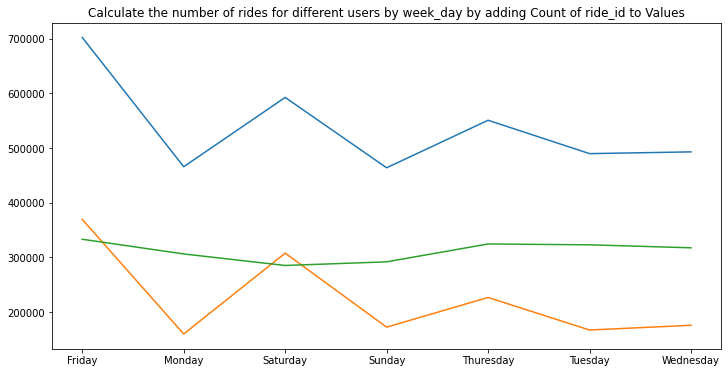

In [128]:
# To plot graph of Weekday Vs Number Of Rides
plt.figure(figsize=(12,6))
plt.plot(count_user_weekday.index,count_user_weekday.values)
plt.plot(count_casual_week_day.index,count_casual_week_day.values)
plt.plot(count_member_week_day.index,count_member_week_day.values)
plt.title('Calculate the number of rides for different users by week_day by adding Count of ride_id to Values')
plt.show()


In [129]:
8# Calculate the average ride_length for users by week_day
user_average_ride_length=df2.groupby('week_name')['ride_delta'].mean(numeric_only=bool(0))


In [130]:
# Calculate the average ride_length for casual by week_day
casual_average_ride_length=df2[df2['member_casual']=='casual'].groupby('week_name')['ride_delta'].mean(numeric_only=bool(0))


In [131]:
#calculating thr average ride length of member only
member_average_ride_length=df2[df2['member_casual']=='member'].groupby('week_name')['ride_delta'].mean(numeric_only=bool(0))
member_average_ride_length


week_name
Friday        0 days 00:16:46.515926549
Monday      -1 days +23:50:08.601301022
Saturday      0 days 00:17:17.020016976
Sunday        0 days 00:14:33.251967235
Thuresday     0 days 00:14:51.062572425
Tuesday       0 days 00:14:29.053946598
Wednesday     0 days 00:14:23.018089784
Name: ride_delta, dtype: timedelta64[ns]

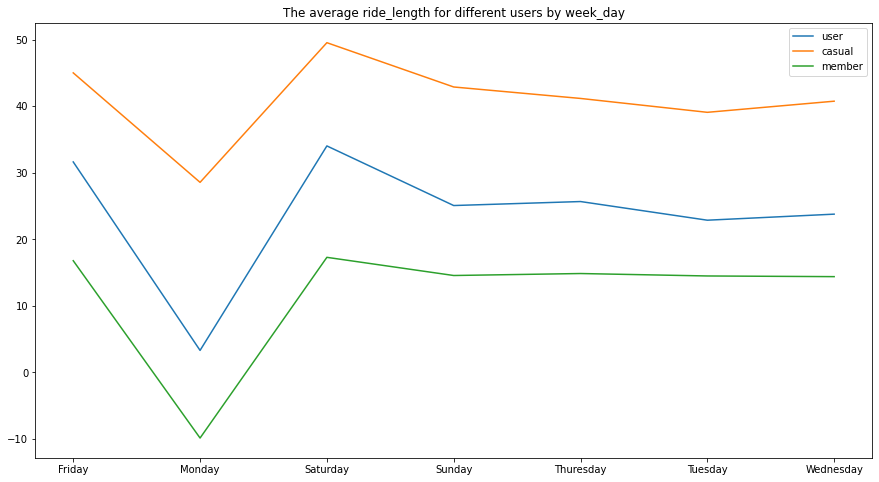

In [132]:
# To plot graph of Weekday Vs Average ride length
plt.figure(figsize=(15,8))
plt.plot((user_average_ride_length)/pd.Timedelta(minutes=1))
plt.plot((casual_average_ride_length)/pd.Timedelta(minutes=1))
plt.plot((member_average_ride_length)/pd.Timedelta(minutes=1))
plt.title("The average ride_length for different users by week_day")
plt.legend(['user','casual','member'])
labels=["Friday","Monday","Saturday","Sunday","Thuresday","Tuesday","Wednesday"]
plt.xticks(user_average_ride_length.index,labels)
plt.show()

In [133]:
#To extract important features of the dataframe into a new dataframe
grand_final=df2[list(df2.columns)]

# **Data analysis**

In [134]:
# To check the number of users in each type over past 12 months
m_c=grand_final['member_casual'].value_counts()

In [135]:
m_c.head()

member    2181125
casual    1578137
Name: member_casual, dtype: int64

Text(0.5, 1.0, 'percentage of each user')

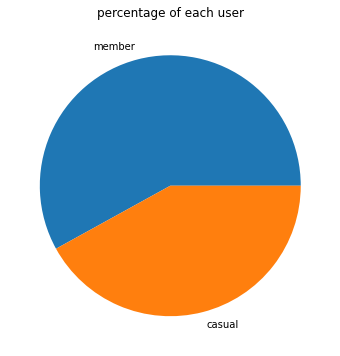

In [136]:
# To plot the pie chart of users in each type
plt.figure(figsize=(8,6))
plt.pie(m_c.values,labels=m_c.index)
plt.title('percentage of each user')

In [137]:
# To check the number of users over years
user_over_year=grand_final.groupby('year')['member_casual'].value_counts()

In [138]:
# To segregate the number of users into member or casual riders over the years
list_year=[]
list_x=[]
list_y=list(user_over_year.values)
for i, j in user_over_year.index:
  list_x.append(j)
  list_year.append(str(i))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'count of member and casual rider over the year')

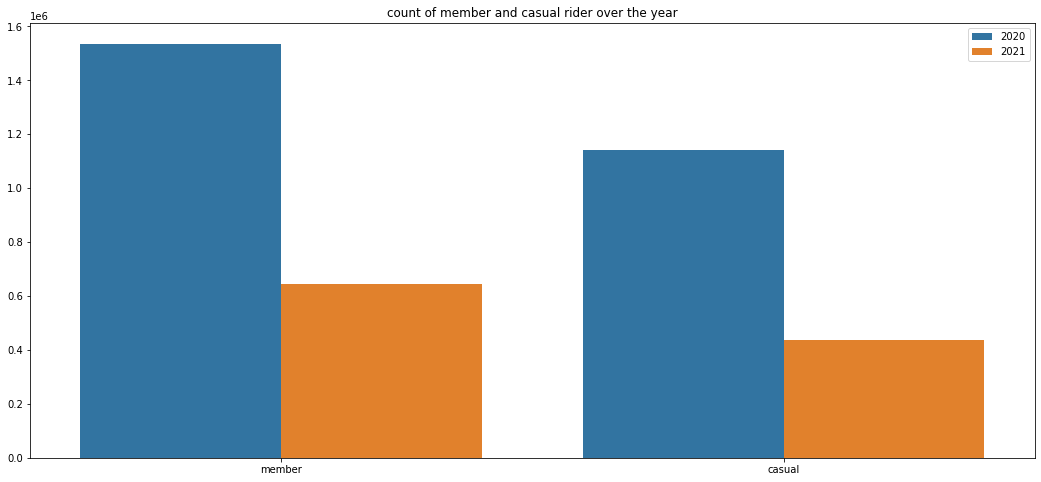

In [139]:
plt.figure(figsize=(18,8))
sns.barplot(list_x,list_y,hue=list_year)
plt.title('count of member and casual rider over the year')

In [140]:
# To check the number of users over months
user_over_month=grand_final.groupby('month')['member_casual'].value_counts()

In [141]:
# To segregate the number of users into member or casual riders over the months
list_month=[]
list_x1=[]
list_y1=list(user_over_month.values)
for i , j in user_over_month.index :
  list_x1.append(j)
  list_month.append(str(i))


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Member and Casual Riders over the months')

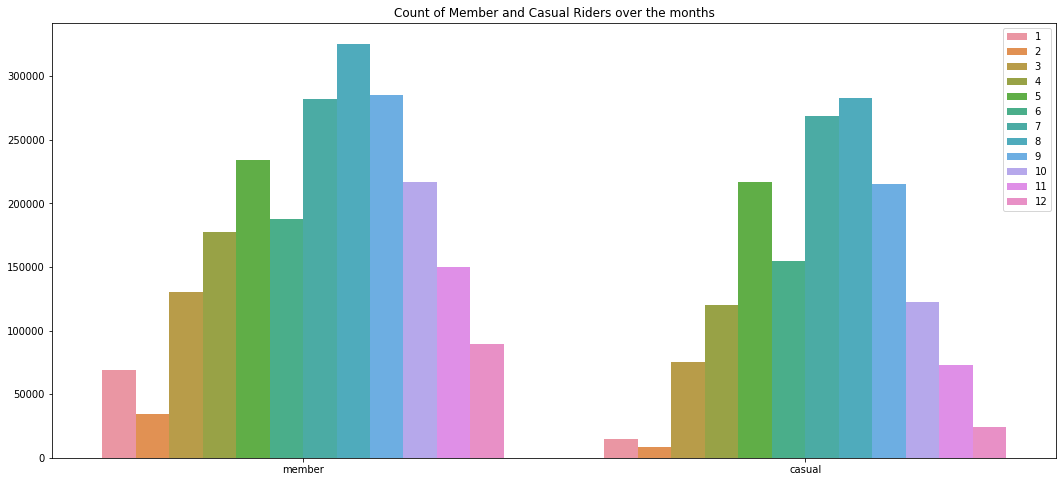

In [142]:
# Plot count of Member and Casual Riders over the months
plt.figure(figsize = (18,8))
sns.barplot(list_x1, list_y1, hue = list_month)

plt.title("Count of Member and Casual Riders over the months")

In [143]:
# To check the number of users for a particulat rideable_type
ride_type = grand_final.groupby("member_casual")["rideable_type"].value_counts()

In [144]:
# To segregate the number of users into member or casual riders based on ride type
list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
  list_x.append(j)
  list_member.append(str(i))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Usage by rideable type')

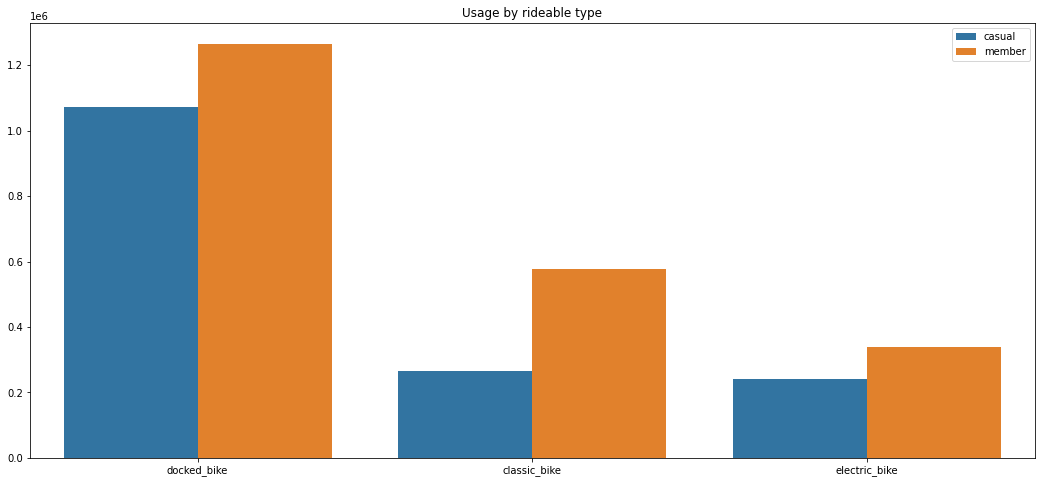

In [145]:
# To plot number of users into member or casual riders based on ride type
plt.figure(figsize = (18,8))
sns.barplot(list_x, list_y, hue = list_member)
plt.title("Usage by rideable type")


In [146]:
#To check the usage of each cycle

In [147]:
a=df2['rideable_type'].value_counts()

Text(0.5, 1.0, 'Usage of each cycle ')

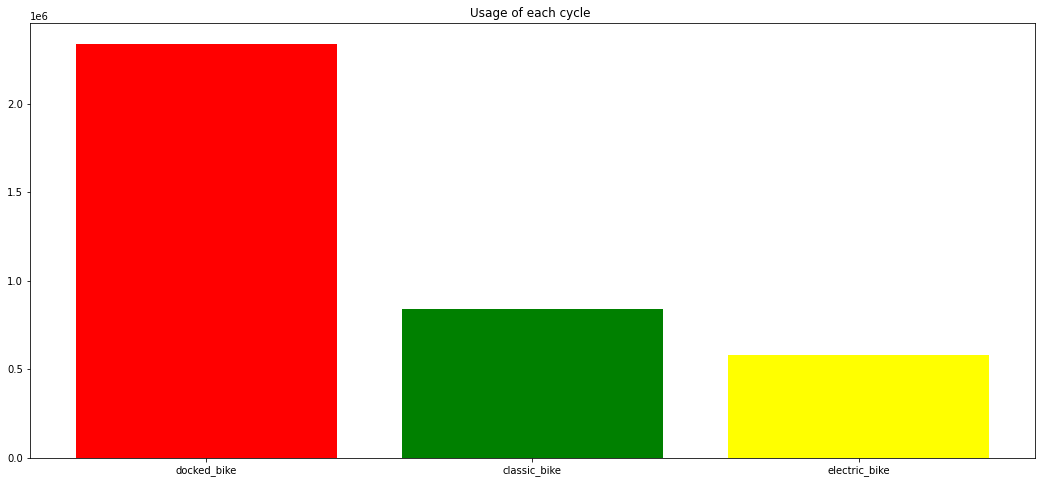

In [148]:
color=['red','green','yellow']
plt.figure(figsize=(18,8))
plt.bar(a.index,a.values,color=color)
plt.title('Usage of each cycle ')

In [149]:
#Usage of cycle by member over the week
wd=df2.groupby('member_casual')['week_name'].value_counts()

In [150]:
lis_member=[]
x=[]
y=list(wd.values)
for i,j in wd.index:
  x.append(i)
  lis_member.append(str(j))

  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Usage of cycle by member_casual over the week')

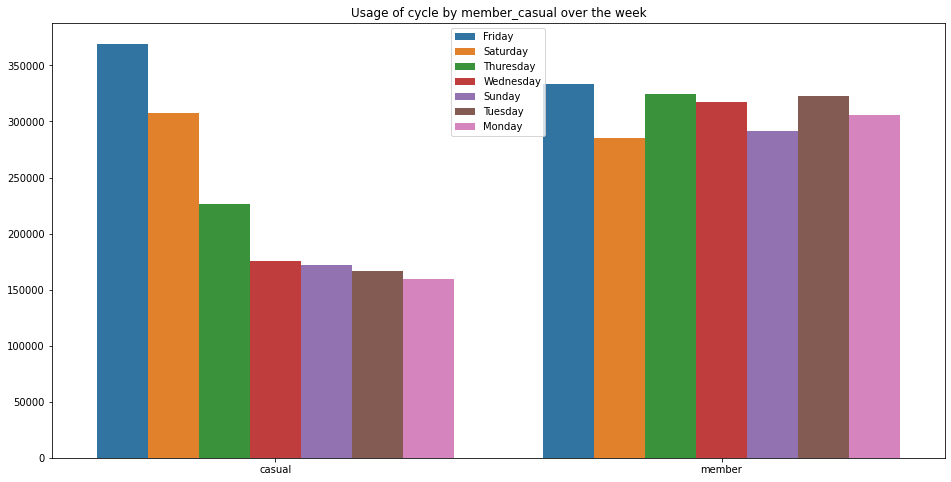

In [151]:
plt.figure(figsize=(16,8))
sns.barplot(x,y,hue=lis_member)
plt.title('Usage of cycle by member_casual over the week')

In [152]:
dict4={1:"January",2:'Febraury',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [153]:
df2['month_name']=df2['month'].apply(lambda x : dict4[x])

<ipython-input-153-fa111288d24b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month_name']=df2['month'].apply(lambda x : dict4[x])


In [154]:
monthly_usage=df2.groupby('month_name')['member_casual'].value_counts()

In [155]:
mem_cas=[]
list_x=[]
list_y=list(monthly_usage.values)
for i,j in monthly_usage.index:
  list_x.append(j)
  mem_cas.append(i)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Usage of cycle over the month by casual and member')

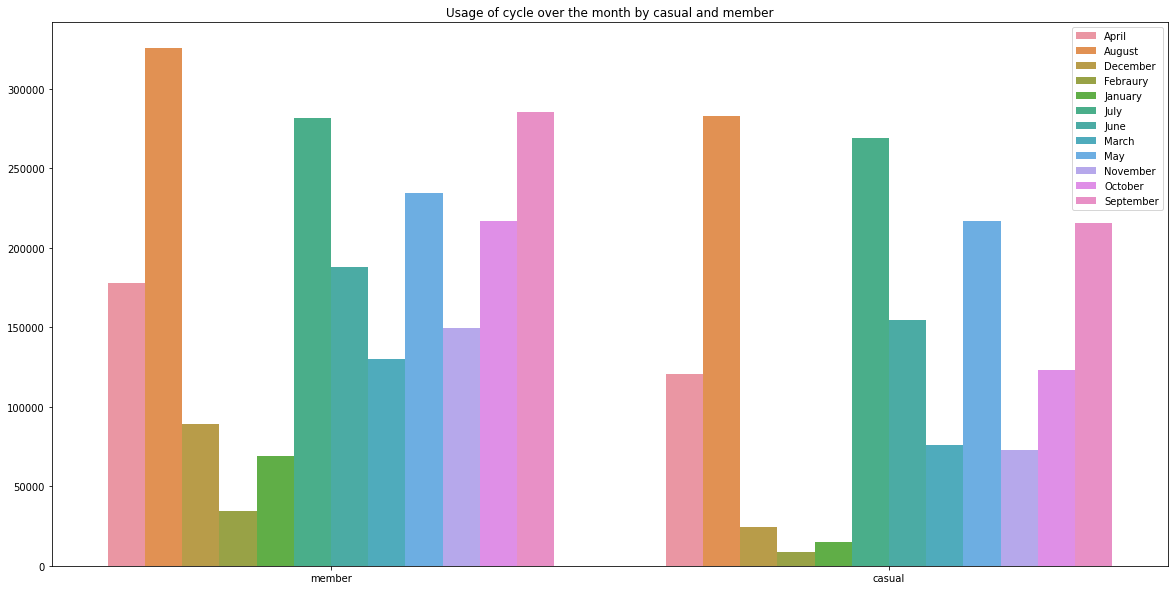

In [156]:
plt.figure(figsize=(20,10))
sns.barplot(list_x,list_y,hue=mem_cas)
plt.title('Usage of cycle over the month by casual and member')


In [157]:
#total distance in each  month by casual and member

In [158]:
monthly_distance=df2.groupby('month_name')['Manhattan_distance'].sum()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total distance travelled by the member')

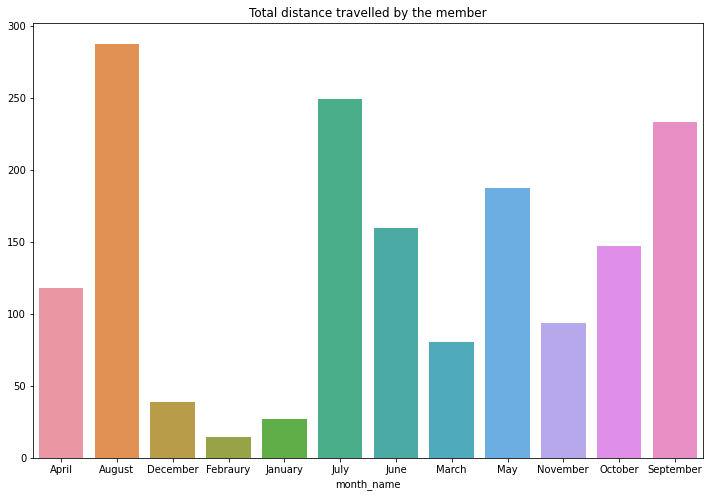

In [159]:
plt.figure(figsize=(12,8))
sns.barplot(monthly_distance.index,monthly_distance.values)
plt.title('Total distance travelled by the member')